In [1]:
import pandas as pd
import os
from functools import reduce

In [2]:
cwd = os.getcwd()
print(cwd)

D:\GitHub\learning-datascience\netflix\notebooks


In [3]:
os.chdir(r'D:\GitHub\learning-datascience\netflix')
cwd = os.getcwd()
print(cwd)

D:\GitHub\learning-datascience\netflix


In [4]:
df = pd.read_csv(r'data\external\netflix_data.csv')
print(df)

             added_date                                               cast  \
0         July 19, 2019  Estefanía de los Santos,Secun de la Rosa,Terel...   
1      December 1, 2016                                                NaN   
2          June 1, 2019  Flavia Hojda,Crina Semciuc,Olimpia Melinte,Lev...   
3      February 5, 2020                                                NaN   
4          May 21, 2020  Adipati Dolken,Vanesha Prescilla,Rendi Jhon,Be...   
...                 ...                                                ...   
5889     April 25, 2020  Bashar al-Shatti,Fatima Al Safi,Maram Balochi,...   
5890     March 30, 2019  Chutavuth Pattarakampol,Sheranut Yusananda,Nic...   
5891     April 27, 2018  Li Nanxing,Christopher Lee,Jesseca Liu,Apple H...   
5892  February 28, 2018                                      Baek Yoon-sik   
5893  September 1, 2018  Um Sang-hyun,Yang Jeong-hwa,Jeon Tae-yeol,Shin...   

                                            description  \
0   

In [5]:
content = pd.read_csv(r'data\external\netflix_data.csv', usecols=['title_name','release_year','genre'] )
content.to_pickle(r'data\interim\content_genres.pickle')
df.to_pickle(r'data\interim\complete.pickle')

In [6]:
new_df = pd.read_pickle(r'data\interim\complete.pickle')
certificates = pd.unique(new_df['title_certification'])
print(certificates)

['TV-MA' 'TV-PG' 'TV-14' 'TV-G' 'TV-Y' 'R' 'PG-13' 'TV-Y7' 'PG' 'G'
 'NC-17']


In [7]:
scifi = new_df['release_year'] == 2020
print(scifi.value_counts())

False    5472
True      422
Name: release_year, dtype: int64


In [8]:
print(new_df.loc[new_df['release_year'] == 2020, new_df['title_name']])

KeyError: "None of [Index(['¡Ay, mi madre!', '#Rucker50', '#Selfie', '#cats_the_mewvie',\n       '#FriendButMarried', '#realityhigh', '#AnneFrank - Parallel Stories',\n       ''89', '#Selfie 69', '#FriendButMarried 2',\n       ...\n       'Zoo', 'Zubaan', 'Zumbo's Just Desserts',\n       'ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS', 'الف مبروك', 'دفعة القاهرة',\n       'แผนร้ายนายเจ้าเล่ห์', '海的儿子', '반드시 잡는다', '최강전사 미니특공대 : 영웅의 탄생'],\n      dtype='object', length=5894)] are in the [columns]"

In [9]:
sorted_df = df.sort_values(by="added_date")
sorted_df['Date']= pd.to_datetime(sorted_df['added_date'])
print(sorted_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5894 entries, 1408 to 5886
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   added_date           5215 non-null   object        
 1   cast                 5376 non-null   object        
 2   description          5894 non-null   object        
 3   genre                5894 non-null   object        
 4   imdb_rating          0 non-null      float64       
 5   length               5894 non-null   object        
 6   production_country   5344 non-null   object        
 7   release_year         5894 non-null   int64         
 8   title_certification  5894 non-null   object        
 9   title_name           5894 non-null   object        
 10  Date                 5215 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 552.6+ KB
None


In [10]:
print(sorted_df[['title_name','Date']])

                                     title_name       Date
1408  DreamWorks Happy Holidays from Madagascar 2013-04-01
1176                     Cyborg 009 VS Devilman 2016-04-01
1705                            Frank and Cindy 2016-04-01
1706                            Frank and Cindy 2016-04-01
5837                               Yo-Kai Watch 2016-04-01
...                                         ...        ...
5862                                         Z4        NaT
5863                                  Zak Storm        NaT
5880                                Zombie Dumb        NaT
5884                                        Zoo        NaT
5886                      Zumbo's Just Desserts        NaT

[5894 rows x 2 columns]


In [11]:
print(sorted_df.mode()['Date'][0])

2020-07-01 00:00:00


In [12]:
grouped_df = new_df.groupby("production_country")
for name, group_df in grouped_df:
    print(name)
    print(group_df)

Argentina
             added_date                                               cast  \
133      March 20, 2020                                                NaN   
201     August 25, 2016  Eugenia Suárez,Esteban Lamothe,Gloria Carrá,Ra...   
242   February 16, 2018                                  Agustín Aristarán   
310         May 2, 2020  Sebastián Wainraich,Natalie Pérez,Santiago Kor...   
396     August 16, 2019  Balthazar Murillo,Vanesa González,Alberto Ajak...   
867    January 20, 2017  Muriel Santa Ana,Peto Menahem,Héctor Díaz,Seba...   
1149                NaN           Fabio Aste,Héctor Segura,Sebastian Rosas   
1298  December 21, 2017  Carolina Ardohain,Mónica Antonópulos,Guilherme...   
1456     March 16, 2018  Juana Viale,Andrés Velencoso,Delfina Chaves,Os...   
1485                NaN  Juan Minujín,Martina Gusman,Gerardo Romano,Cla...   
1621       May 25, 2018                                   Fernando Sanjiao   
1842                NaN  Pilar Pascual,Renata Toscano,

     added_date                                               cast  \
1057        NaN  Hunter Page-Lochard,Rob Collins,Deborah Mailma...   

                                            description  \
1057  In the near future, physically powerful beings...   

                                           genre  imdb_rating     length  \
1057  TV Dramas,TV Sci-Fi & Fantasy,TV Thrillers          NaN  2 Seasons   

                       production_country  release_year title_certification  \
1057  Australia,New Zealand,United States          2017               TV-MA   

     title_name  
1057  Cleverman  
Australia,United Arab Emirates
            added_date                                               cast  \
3534  October 15, 2017  Jessica De Gouw,T.J. Power,Thomas Cocquerel,Li...   
3938  January 15, 2018  Debby Ryan,Genevieve Hegney,Andrew Creer,Naomi...   

                                            description  \
3534  After inventing a drug that induces time-compr...   
3938  Follo

           added_date                                               cast  \
445  December 1, 2017  Eric Bauza,Lisa Norton,Carlos Díaz,Peter Oldri...   

                                           description  \
445  Captain Atomic – once a superhero, now a sock ...   

                                   genre  imdb_rating    length  \
445  Crime TV Shows,Kids' TV,TV Comedies          NaN  1 Season   

    production_country  release_year title_certification     title_name  
445      Canada,France          2016               TV-Y7  Atomic Puppet  
Canada,France,Japan
             added_date                                               cast  \
4235  December 13, 2019  Deborah Kara Unger,Adelaide Clemens,Sean Bean,...   

                                            description          genre  \
4235  Haunted by nightmares and her father's disappe...  Horror Movies   

      imdb_rating  length   production_country  release_year  \
4235          NaN  94 min  Canada,France,Japan          2

            added_date                                               cast  \
100   December 1, 2018  Qi Shu,Liu Ye,Anthony Wong Chau-Sang,Liang Tia...   
1112     July 21, 2019  Louis Koo,Barbie Hsu,Nick Cheung,Liu Ye,Louis ...   
1320  February 6, 2019  Mark Chao,Feng Shaofeng,Kenny Lin,Carina Lau,E...   
2242    August 1, 2018  Jay Chou,Anne Suzuki,Edison Chen,Anthony Wong ...   
2281     June 18, 2016  Donnie Yen,Zhang Jin,Lynn Hung,Patrick Tam,Kar...   
2749  December 1, 2018  Nick Cheung,Louis Koo,Francis Chun-Yu Ng,Charm...   
2844  January 31, 2019  Miriam Chin Wah Yeung,Shawn Yue,Paul Chun,Jian...   
2948       May 4, 2018  Zhang Hanyu,Masaharu Fukuyama,Qi Wei,Ji-won Ha...   
4174  November 6, 2019  Deng Chao,Sun Li,Ryan Cheng,Wang Qianyuan,Hu J...   
4746      May 12, 2019  Kara Hui,Philip Keung,Benjamin Yuen,Sisley Cho...   

                                            description  \
100   After meeting under awkward circumstances, a g...   
1112  In this remake of "Cellular,

         added_date                 cast  \
1492  June 28, 2019  Jesús Abad Colorado   

                                            description  \
1492  Colombian photojournalist Jesús Abad Colorado ...   

                                   genre  imdb_rating  length  \
1492  Documentaries,International Movies          NaN  73 min   

      production_country  release_year title_certification  title_name  
1492  Dominican Republic          2018               TV-14  El testigo  
Egypt
          added_date                                               cast  \
20      June 1, 2020  Amina Khalil,Ahmed Dawood,Tarek Lotfy,Ahmed El...   
60    April 18, 2019  Taher Farouz,Sad Al-Saghir,Ahmad Faloks,Soleim...   
192   April 19, 2019                                    Mohamed Ramadan   
327   April 26, 2019  Ghadah Abdulrazeq,Wafaa Amer,Hassan El Raddad,...   
351   April 26, 2019  Eyad Nassar,Ahmed Bedir,Fathy Abdel Wahab,Saws...   
...              ...                                       

5066       France,Egypt          1999               TV-MA  The Other  
France,Germany
            added_date cast  \
4724  December 8, 2016  NaN   

                                            description  \
4724  This documentary series recounts the tumultuou...   

                                  genre  imdb_rating    length  \
4724  Docuseries,International TV Shows          NaN  1 Season   

     production_country  release_year title_certification  \
4724     France,Germany          2015               TV-14   

                title_name  
4724  The Cuba Libre Story  
France,Iran,United States
            added_date                                               cast  \
5073  November 2, 2018  John Huston,Oja Kodar,Peter Bogdanovich,Susan ...   

                                            description  \
5073  On the last day of his life, a legendary direc...   

                                         genre  imdb_rating   length  \
5073  Classic Movies,Dramas,Independent Movies

           added_date                                               cast  \
724  October 13, 2017  Ahmad Thaher,Maher Khammash,Odai Hijazi,Nadeem...   

                                           description  \
724  After being wrongfully convicted of fraud, an ...   

                                    genre  imdb_rating  length  \
724  Comedies,Dramas,International Movies          NaN  83 min   

             production_country  release_year title_certification  \
724  Germany,Jordan,Netherlands          2016               TV-14   

          title_name  
724  Blessed Benefit  
Germany,Sri Lanka
        added_date                            cast  \
948  March 1, 2017  K.G. Chandani Renuka Ratnayake   

                                           description  \
948  A girl who wants to be an elephant driver like...   

                                  genre  imdb_rating  length  \
948  Documentaries,International Movies          NaN  87 min   

    production_country  release_year ti

3183          2017               TV-Y7  Monster Island  
India,Nepal
           added_date                                               cast  \
3573  January 7, 2019  Anmol Limbu,Ishika Gurung,Manju Chettri,Banita...   

                                            description  \
3573  Fleeing unrest in their native Nepal, three yo...   

                                     genre  imdb_rating  length  \
3573  Comedies,Dramas,International Movies          NaN  82 min   

     production_country  release_year title_certification title_name  
3573        India,Nepal          2018               TV-PG     Pahuna  
India,Pakistan
            added_date                                               cast  \
5627  January 30, 2019  Arya Babbar,Kanwaljeet Singh,Gulshan Grover,Me...   

                                            description  \
5627  A man is disheartened when he visits his well-...   

                                             genre  imdb_rating   length  \
5627  Dramas,Inte

             added_date                                               cast  \
1610                NaN  Lior Raz,Hisham Suliman,Shadi Mar'i,Laëtitia E...   
1977  December 28, 2018  Moshe Ivgy,Guy Loel,Yuval Semo,Yigal Adika,Avi...   
2102                NaN  Jonah Lotan,Ayelet Zurer,Tomer Kapon,Micha Cel...   
2252   January 29, 2019                                                NaN   
2929      June 15, 2018        Guy Amir,Hanan Savyon,Itzik Cohen,Igal Naor   
3196                NaN  Yehuda Levi,Yehoram Gaon,Shai Avivi,Liron Vais...   
3421  December 31, 2017                                                NaN   
4175   January 27, 2017                                                NaN   
4216                NaN  Doval'e Glickman,Michael Aloni,Ayelet Zurer,Ne...   
4438       July 1, 2016        Mali Levi,Rotem Keinan,Dror Keren,Igal Naor   
4837      June 26, 2019  Hani Furstenberg,Ishai Golan,Kirill Cernyakov,...   
5742   January 10, 2019  Tomer Kapon,Ninet Tayeb,Michael Aloni,N

4697      Mexico,France          2015               TV-MA  The Chosen Ones  
Mexico,Netherlands
             added_date                                               cast  \
5346  November 30, 2018  Luis Gerardo Méndez,Miguel Rodarte,R.J. Mitte,...   

                                            description  \
5346  Husband and father Pedro becomes increasingly ...   

                                               genre  imdb_rating  length  \
5346  Dramas,Independent Movies,International Movies          NaN  96 min   

      production_country  release_year title_certification  title_name  
5346  Mexico,Netherlands          2018               TV-MA  Time Share  
Mexico,Spain
           added_date                                               cast  \
3579  January 1, 2020  Ivana Baquero,Sergi López,Maribel Verdú,Doug J...   
4582    April 6, 2018  Adrian Ladron,Andoni Gracia,Hernán Mendoza,Gab...   

                                            description  \
3579  Young Ofelia meets a

            added_date                                               cast  \
3189  November 1, 2017  Hameed Sheikh,Samiya Mumtaz,Shaz Khan,Abdul Qa...   
4261     March 8, 2020                                                NaN   

                                            description  \
3189  A railway stationmaster tries to cope with his...   
4261  In this silent short set in 1970s Pakistan, 14...   

                                               genre  imdb_rating   length  \
3189  Dramas,Independent Movies,International Movies          NaN  135 min   
4261                 Children & Family Movies,Dramas          NaN   16 min   

          production_country  release_year title_certification  \
3189  Pakistan,United States          2015               TV-MA   
4261  Pakistan,United States          2020               TV-PG   

                   title_name  
3189                     Moor  
4261  Sitara: Let Girls Dream  
Paraguay,Argentina
         added_date                      

1348                   R  District 9  
South Korea
             added_date                                               cast  \
42       April 28, 2017  4Minute,B1A4,BtoB,ELSIE,EXID,EXO,Got7,INFINITE...   
51      October 1, 2017  Goo Jin,Hye-jin Han,Soo-bin Bae,Seul-ong Im,Ky...   
131       March 5, 2019  Lee Seung-gi,Cha Seung-won,Oh Yeon-seo,Lee Hon...   
140      March 12, 2019  Song Il-gook,Han Chae-young,Kim Min-jong,Go Eu...   
198                 NaN             Hyun-moo Jun,Si-kyung Sung,Se-yoon Yoo   
...                 ...                                                ...   
5761  February 14, 2017  Yo-Won Lee,Goo Jin,U-ie,Hae-in Jung,Gook-hwan ...   
5831    October 5, 2018  Seungri,Yoo Byung Jae,Lee Jai-jin,Jinu,Son Se-...   
5832    August 17, 2018                                      Yoo Byung Jae   
5836                NaN  Kira Buckland,Ryan Bartley,Bryce Papenbrook,Ca...   
5892  February 28, 2018                                      Baek Yoon-sik   

            

4866  Spain,United States,Canada          2017               TV-PG  The Healer  
Sweden
          added_date                                               cast  \
771              NaN  Vera Vitali,Erik Johansson,Fredrik Hallgren,Pe...   
881   March 18, 2020  Aliette Opheim,Gizem Erdogan,Amed Bozan,Albin ...   
1226   April 1, 2020                                        David Batra   
1579   April 1, 2018  Lisa Henni,Adam Godley,Tomas von Brömssen,Lia ...   
2318  March 15, 2018  Björn Kjellman,Christine Meltzer,Rodolfo Corsa...   
3809   April 5, 2019  Hanna Ardéhn,Felix Sandman,William Spetz,Ella ...   
4575  April 25, 2017  Robert Gustafsson,Jens Hultén,Caroline Boulton...   
5038   July 20, 2017     Björn Kjellman,Joy Sengupta,Natasha Jayetileke   

                                            description  \
771   A new couple, their exes and their children na...   
881   An impending ISIS attack on Sweden entangles a...   
1226  Swedish comedian David Batra gets personal as ...   


[266 rows x 10 columns]
United Kingdom,Belgium,Sweden
       added_date cast                                        description  \
2660  May 6, 2019  NaN  A commercial diver becomes trapped on the ocea...   

                                   genre  imdb_rating  length  \
2660  Documentaries,International Movies          NaN  86 min   

                 production_country  release_year title_certification  \
2660  United Kingdom,Belgium,Sweden          2019               TV-MA   

       title_name  
2660  Last Breath  
United Kingdom,Canada
            added_date                                               cast  \
1003               NaN  Abigail Oliver,Andrea Libman,Briana Buckmaster...   
1152               NaN  Victoria Diamond,William Romain,Sydney Wade,Je...   
5132  February 9, 2018  Rafe Spall,Arsher Ali,Robert James-Collier,Sam...   

                                            description  \
1003  Lovable pug Chip starts kindergarten, makes ne...   
1152  A masked figure kn

2850  Love Wedding Repeat  
United Kingdom,Italy,Argentina,United States
             added_date                                         cast  \
5231  December 20, 2019  Anthony Hopkins,Jonathan Pryce,Juan Minujín   

                                            description   genre  imdb_rating  \
5231  At a key turning point for the Catholic Church...  Dramas          NaN   

       length                            production_country  release_year  \
5231  126 min  United Kingdom,Italy,Argentina,United States          2019   

     title_certification     title_name  
5231               PG-13  The Two Popes  
United Kingdom,Italy,Israel,Peru,United States
             added_date           cast  \
4962  September 1, 2017  James Freeman   

                                            description  \
4962  In a last-ditch effort to prevent suicide, a c...   

                                   genre  imdb_rating  length  \
4962  Documentaries,International Movies          NaN  83 min   



2634  United States,Argentina          2020               TV-MA  LA Originals  
United States,Australia
            added_date                                               cast  \
596    January 1, 2017  Jerry Seinfeld,Renée Zellweger,Matthew Broderi...   
931   February 1, 2019  James Marsden,Nick Nolte,Christina Applegate,K...   
2439    August 1, 2019  Mila Kunis,Channing Tatum,Sean Bean,Eddie Redm...   
2485      July 1, 2020  Jerry O'Connell,Anthony Anderson,Estella Warre...   

                                            description  \
596   Barry, a worker bee stuck in a dead-end job ma...   
931   Cats and dogs must set aside their differences...   
2439  A young impoverished woman learns she's been p...   
2485  Two boyhood pals sent to Australia to deliver ...   

                                                  genre  imdb_rating   length  \
596                   Children & Family Movies,Comedies          NaN   92 min   
931                   Children & Family Movies,Comed

4769               TV-MA  The Drowning  
United States,Hungary
            added_date                                               cast  \
4343  December 9, 2016  James Badge Dale,Emily Mortimer,Bruce Greenwoo...   

                                            description  \
4343  When an otherworldly force wreaks havoc on a w...   

                                    genre  imdb_rating   length  \
4343  Action & Adventure,Sci-Fi & Fantasy          NaN  108 min   

         production_country  release_year title_certification title_name  
4343  United States,Hungary          2016               TV-14   Spectral  
United States,Hungary,Ireland,Canada
     added_date                                               cast  \
4654        NaN  Jeremy Irons,François Arnaud,Holliday Grainger...   

                                            description      genre  \
4654  Follow the lives of the notorious Borgia famil...  TV Dramas   

      imdb_rating     length                    production_

2145  Hunter's Prayer  
United States,Spain,Italy
             added_date                                               cast  \
3119  February 28, 2019  Clint Dyer,Annabelle Wallis,Tom Cullen,Armie H...   

                                            description  \
3119  When a Marine's mission goes awry, he must sur...   

                                      genre  imdb_rating   length  \
3119  Dramas,International Movies,Thrillers          NaN  106 min   

             production_country  release_year title_certification title_name  
3119  United States,Spain,Italy          2016               TV-14       Mine  
United States,Sweden
             added_date                                               cast  \
953     October 1, 2018  Jason Clarke,Kate Mara,Ed Helms,Bruce Dern,Jim...   
3108  November 27, 2018  Patton Oswalt,Catherine Taber,Sean Astin,Melis...   
4492   January 30, 2019  Paul Dano,Daniel Radcliffe,Mary Elizabeth Wins...   

                                           

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout':True,'axes.titlepad':20})

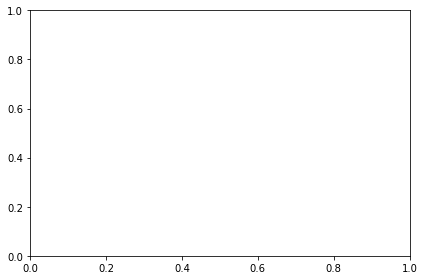

d:\github\learning-datascience\project_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='added_date'>

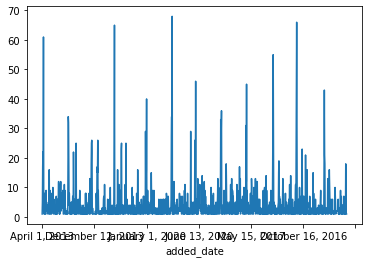

In [15]:
content_additions = df.groupby("added_date").size()
content_additions.plot()

<AxesSubplot:xlabel='release_year'>

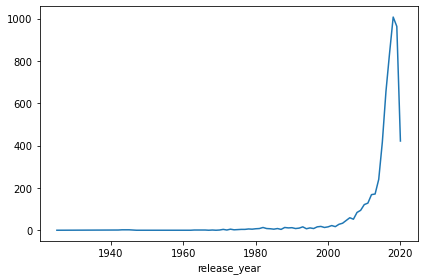

In [16]:
content_by_year = df.groupby("release_year").size()
content_by_year.plot()

<ipython-input-22-1540c7de43ae>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


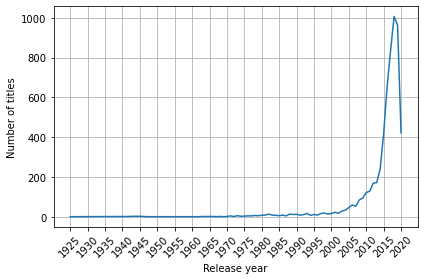

In [22]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
content_by_year.plot(ax=subplot,rot=45,grid=True)
subplot.set_xlabel("Release year")
subplot.set_ylabel("Number of titles")
subplot.locator_params(nbins=40,axis='x')
fig.show()